In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("/content/wine_data.csv" , header = None , usecols = [0,1,2])
df.columns = ["Class" , "Alcohol" , "Malic Acid"]
df.head()

,Class,Alcohol,Malic Acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


# **Robust Scaling**

In [56]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(df.drop("Class" , axis = 1) ,
                                                       df["Class"] ,
                                                       test_size = 0.3 ,
                                                       random_state = 0)

In [68]:
def mean_normalization(values):
  mean_ = values.mean()
  max_ = values.max()
  min_ = values.min()
  val = []
  for i in values:
    res = (i - mean_) / (max_ - min_)
    val.append(round(res , 4))
  return val
X_train_scaled = pd.DataFrame(X_train)
X_test_scaled = pd.DataFrame(X_test)
X_train_scaled["Alcohol"] = mean_normalization(X_train_scaled["Alcohol"])
X_train_scaled["Malic Acid"] = mean_normalization(X_train_scaled["Malic Acid"])

X_train_scaled["Alcohol"] = mean_normalization(X_train_scaled["Alcohol"])
X_train_scaled["Malic Acid"] = mean_normalization(X_train_scaled["Malic Acid"])

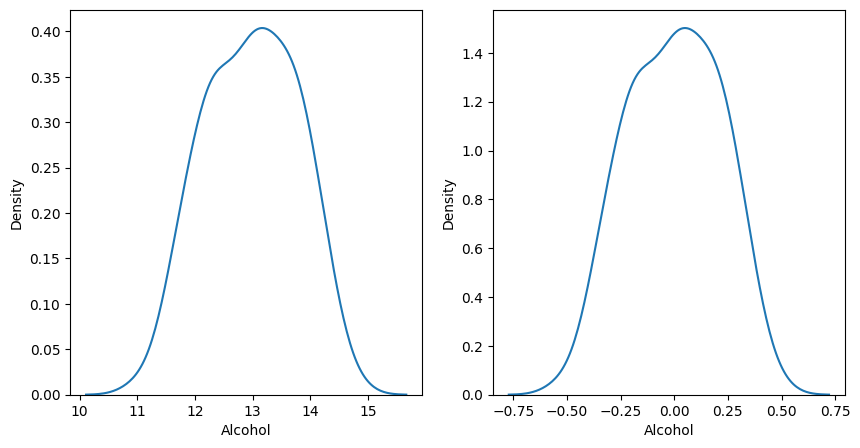

In [70]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10 , 5))
# Before Scaling
sns.kdeplot(X_train["Alcohol"] , ax = ax1)
# After Scaling
sns.kdeplot(X_train_scaled["Alcohol"] , ax = ax2)
plt.show()


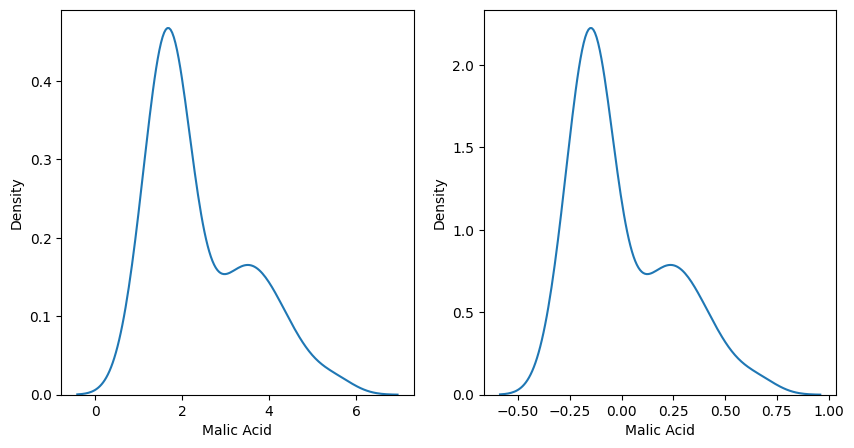

In [71]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10 , 5))
# Before Scaling
sns.kdeplot(X_train["Malic Acid"] , ax = ax1)
# After Scaling
sns.kdeplot(X_train_scaled["Malic Acid"] , ax = ax2)
plt.show()


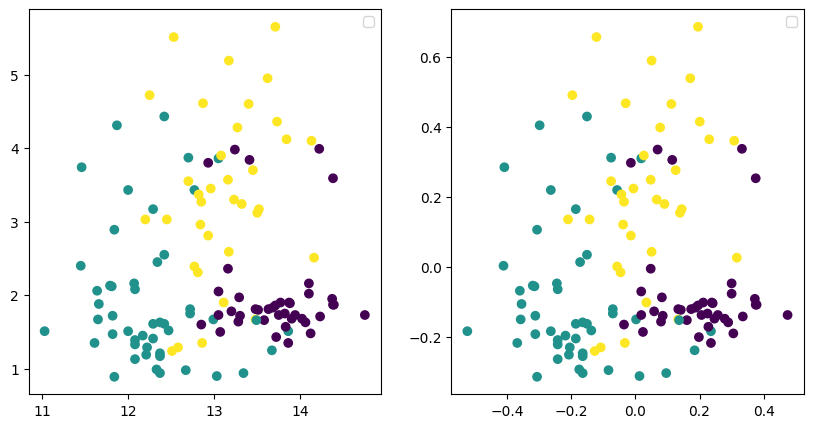

In [72]:
fig , (ax1 , ax2) = plt.subplots(ncols = 2 , figsize = (10 , 5))
# Before Scaling
ax1.scatter(X_train["Alcohol"] , X_train["Malic Acid"] , c = y_train )
# After Scaling
ax2.scatter(X_train_scaled["Alcohol"] , X_train_scaled["Malic Acid"] , c = y_train )
ax1.legend()
ax2.legend()
plt.show()